In [2]:
import os
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt

current_dir = os.getcwd() + "/../../data/2015_BOE_Chiu/mat"
file_name_array = os.listdir(current_dir)

all_images = []
autoaticFluidDME = []
manualFluid1 = []
manualFluid2 = []
automaticLayersDME = []
manualLayers1 = []
manualLayers2 = []
for file_name in file_name_array:
    if "mat" in file_name:
        print("loading {}".format(file_name))
        mat_data = sio.loadmat(os.path.join(current_dir, file_name))
        print(mat_data.keys())
        all_images.append(mat_data["images"])
        autoaticFluidDME.append(mat_data["automaticFluidDME"])
        manualFluid1.append(mat_data["manualFluid1"])
        manualFluid2.append(mat_data["manualFluid2"])
        automaticLayersDME.append(mat_data["automaticLayersDME"])
        manualLayers1.append(mat_data["manualLayers1"])
        manualLayers2.append(mat_data["manualLayers2"])

print("all images shape: {}".format(all_images[0].shape))

loading Subject_01.mat
dict_keys(['__header__', '__version__', '__globals__', 'images', 'automaticFluidDME', 'manualFluid1', 'manualFluid2', 'automaticLayersDME', 'automaticLayersNormal', 'manualLayers1', 'manualLayers2'])
loading Subject_02.mat
dict_keys(['__header__', '__version__', '__globals__', 'images', 'automaticFluidDME', 'manualFluid1', 'manualFluid2', 'automaticLayersDME', 'automaticLayersNormal', 'manualLayers1', 'manualLayers2'])
loading Subject_03.mat
dict_keys(['__header__', '__version__', '__globals__', 'images', 'automaticFluidDME', 'manualFluid1', 'manualFluid2', 'automaticLayersDME', 'automaticLayersNormal', 'manualLayers1', 'manualLayers2'])
loading Subject_04.mat
dict_keys(['__header__', '__version__', '__globals__', 'images', 'automaticFluidDME', 'manualFluid1', 'manualFluid2', 'automaticLayersDME', 'automaticLayersNormal', 'manualLayers1', 'manualLayers2'])
loading Subject_05.mat
dict_keys(['__header__', '__version__', '__globals__', 'images', 'automaticFluidDME',

In [3]:
from ipywidgets import interact

def browse_images_slices(x,z):
    plt.figure(figsize=(8, 8))
    plt.imshow(all_images[x][:, :, z], cmap='gray')
    plt.title(f"Image {x} Slice {z}")
    plt.axis('off')
    plt.show()

def browse_autoaticFluidDME_slices(x,z):
    plt.figure(figsize=(8, 8))
    plt.imshow(autoaticFluidDME[x][:, :, z], cmap='gray')
    plt.title(f"Image {x} Slice {z}")
    plt.axis('off')
    plt.show()

def browse_manualFluid1_slices(x,z):
    plt.figure(figsize=(8, 8))
    plt.imshow(manualFluid1[x][:, :, z], cmap='gray')
    plt.title(f"Image {x} Slice {z}")
    plt.axis('off')
    plt.show()

def browse_manualFluid2_slices(x,z):
    plt.figure(figsize=(8, 8))
    plt.imshow(manualFluid2[x][:, :, z], cmap='gray')
    plt.title(f"Image {x} Slice {z}")
    plt.axis('off')
    plt.show()

def browse_automaticLayersDME_slices(x,z):
    plt.figure(figsize=(8, 8))
    plt.imshow(automaticLayersDME[x][:, :, z], cmap='gray')
    plt.title(f"Image {x} Slice {z}")
    plt.axis('off')
    plt.show()

def browse_manualLayers1_slices(x,z):
    plt.figure(figsize=(8, 8))
    plt.imshow(manualLayers1[x][:, :, z], cmap='gray')
    plt.title(f"Image {x} Slice {z}")
    plt.axis('off')
    plt.show()

def browse_manualLayers2_slices(x,z):
    plt.figure(figsize=(8, 8))
    plt.imshow(manualLayers2[x][:, :, z], cmap='gray')
    plt.title(f"Image {x} Slice {z}")
    plt.axis('off')
    plt.show()

interact(browse_images_slices,x=(0, 9), z=(0, 60))

interactive(children=(IntSlider(value=4, description='x', max=9), IntSlider(value=30, description='z', max=60)…

<function __main__.browse_images_slices(x, z)>

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np # 确保导入 numpy

# --- 假设第一个代码单元已运行并且 'all_images' 列表已填充 ---

# 选择要导出的受试者索引 (例如 0 代表 Subject_01)
subject_index = 0
if subject_index < len(all_images):
    selected_volume = all_images[subject_index]

    # 创建输出目录 (如果不存在)
    # 目录将创建在 notebook 文件所在的 utils/mat/ 目录下
    output_dir = f'../../chart/exported_b_scans_subject_{subject_index + 1:02d}'
    os.makedirs(output_dir, exist_ok=True)
    print(f"输出目录: {os.path.abspath(output_dir)}") # 打印绝对路径以供参考

    # 获取切片数量
    num_slices = selected_volume.shape[2]

    # 遍历所有 B-Scan 切片并保存
    print(f"开始导出 Subject {subject_index + 1} 的 {num_slices} 个 B-Scan 切片...")
    for z in range(num_slices):
        slice_image = selected_volume[:, :, z]
        # 定义文件名 (例如: b_scan_000.png, b_scan_001.png, ...)
        filename = os.path.join(output_dir, f'b_scan_{z:03d}.png')
        # 使用 matplotlib.pyplot.imsave 保存灰度图像
        # cmap='gray' 确保以灰度格式保存
        try:
            plt.imsave(filename, slice_image, cmap='gray')
        except Exception as e:
            print(f"保存切片 {z} 时出错: {e}")

    print(f"成功导出 {num_slices} 张 B-Scan 图像到目录 '{output_dir}'")
else:
    print(f"错误：选择的 subject_index ({subject_index}) 超出范围 (可用范围 0 到 {len(all_images)-1})")


输出目录: c:\Users\86178\Desktop\GIT Program Workspace\OCT-retinal-layering\chart\exported_b_scans_subject_01
开始导出 Subject 1 的 61 个 B-Scan 切片...
成功导出 61 张 B-Scan 图像到目录 '../../chart/exported_b_scans_subject_01'


从 '../../chart/exported_b_scans_subject_01' 中选择 6 张 B-Scan 图像进行可视化...


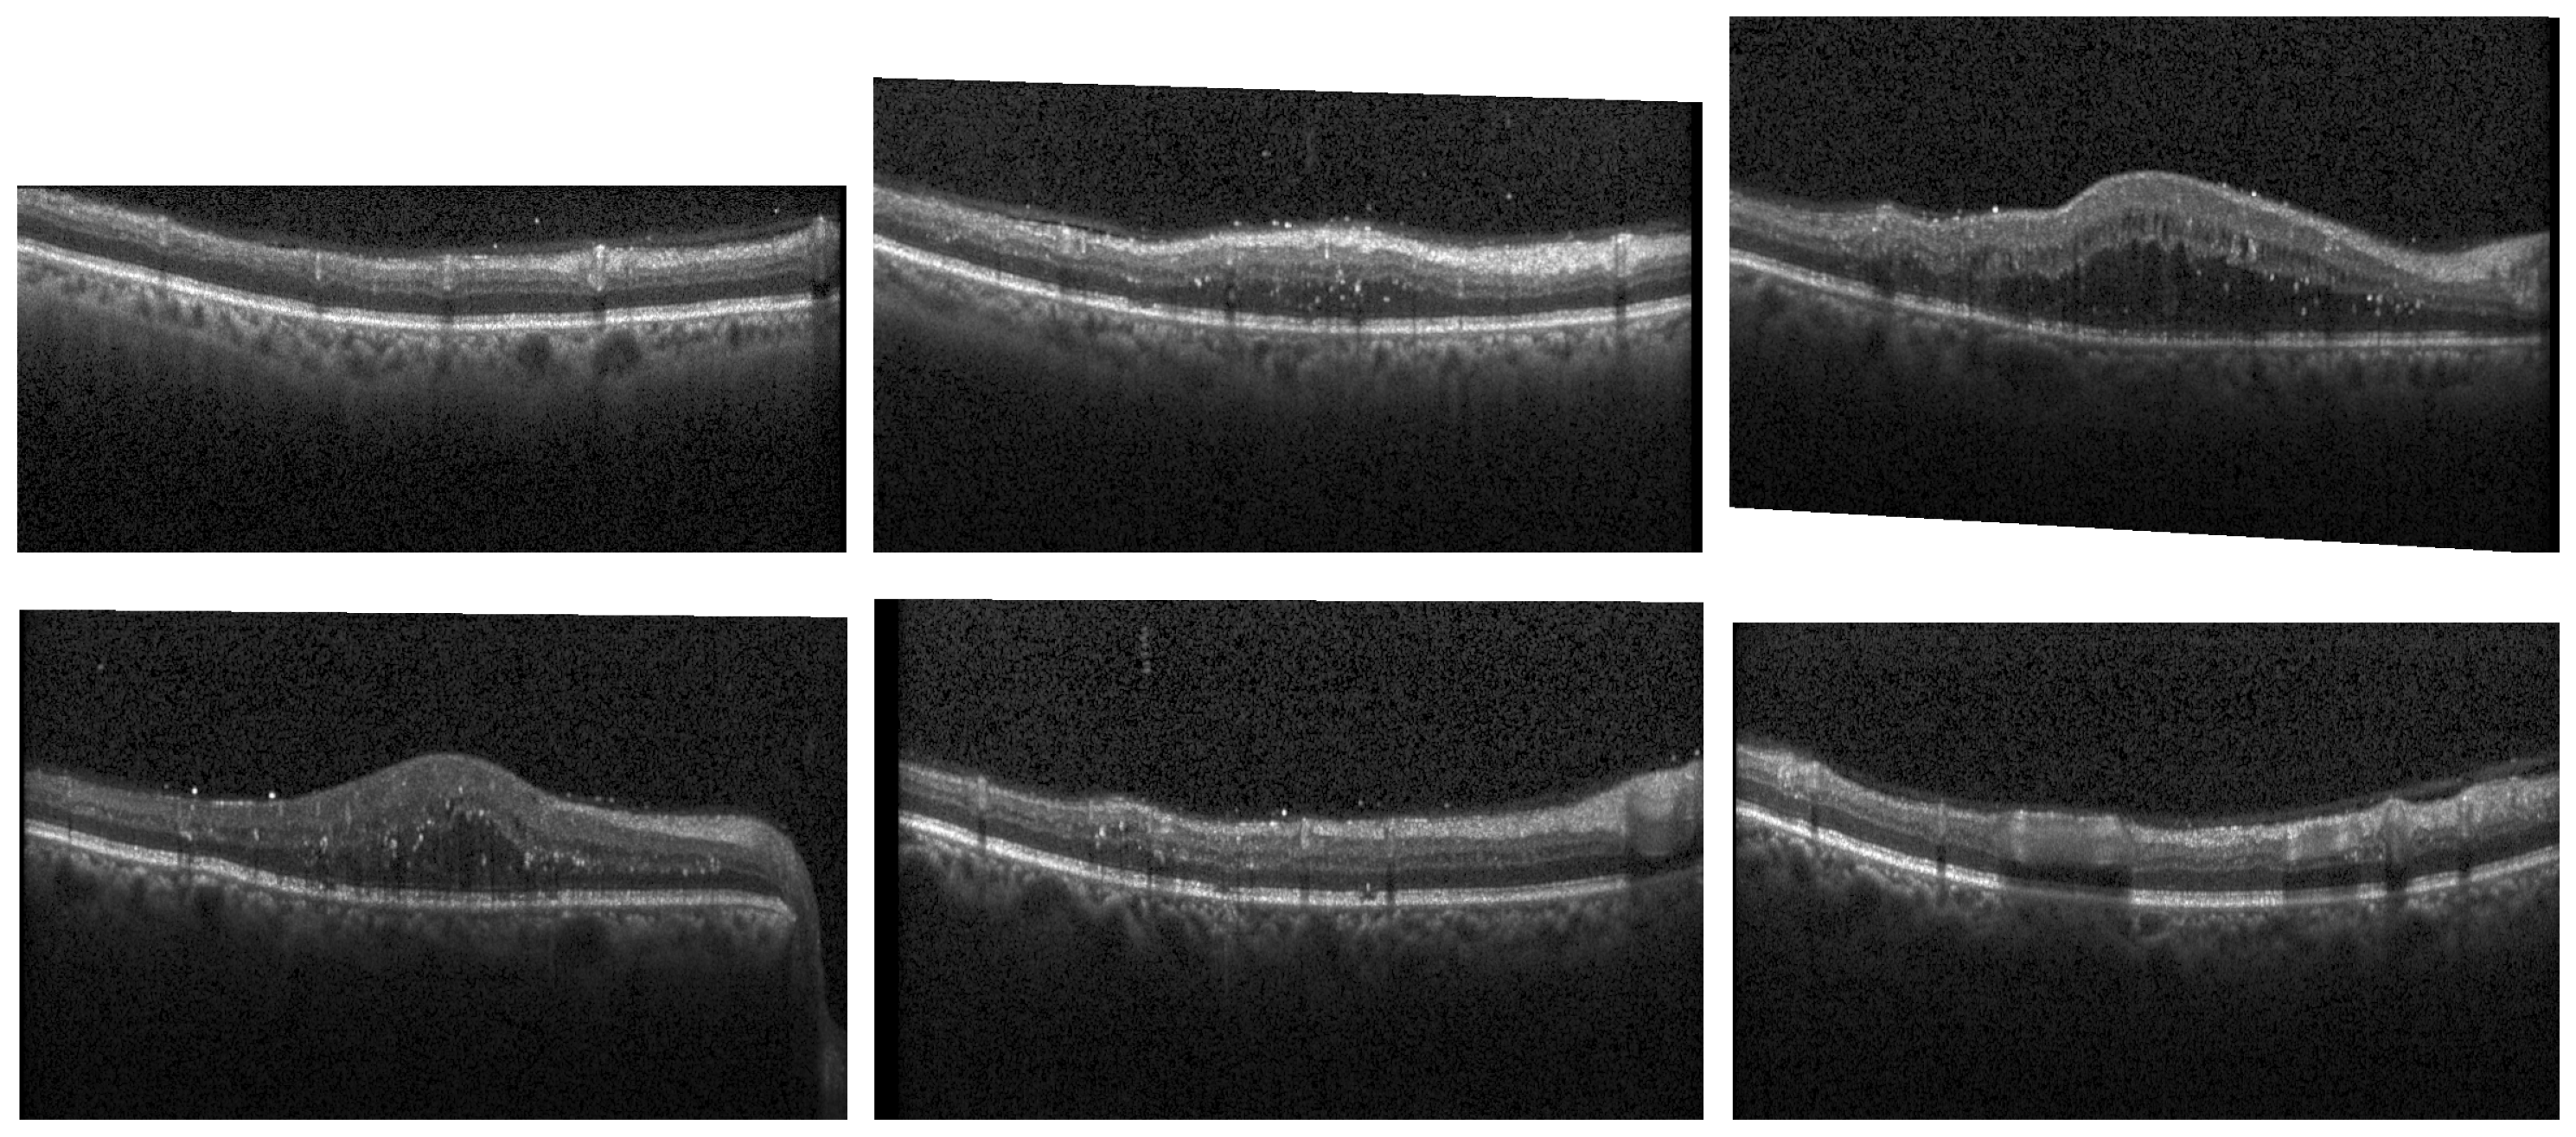

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # 用于读取图像文件
import numpy as np
import math

# --- 确保之前的代码单元已运行 ---

# 指定包含导出 B-Scan 图像的目录
# (确保这里的 subject_index 与上一步导出时使用的相匹配)
subject_index = 0
output_dir = f'../../chart/exported_b_scans_subject_{subject_index + 1:02d}'

# 检查目录是否存在
if not os.path.isdir(output_dir):
    print(f"错误：目录 '{output_dir}' 不存在。请先运行上一个单元格导出图像。")
else:
    # 获取所有 PNG 文件
    all_files = sorted([f for f in os.listdir(output_dir) if f.endswith('.png')])

    if not all_files:
        print(f"错误：目录 '{output_dir}' 中没有找到 PNG 图像。")
    else:
        # 选择要显示的切片数量和索引
        num_total_slices = len(all_files)
        num_display_slices = 6 # 选择显示 6 张图像
        # 计算均匀间隔的切片索引
        indices_to_display = np.linspace(0, num_total_slices - 1, num_display_slices, dtype=int)
        selected_files = [all_files[i] for i in indices_to_display]

        # 设置网格布局
        cols = 3
        rows = math.ceil(num_display_slices / cols)
        fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), dpi=200)
        # 如果只有一个子图，axes不是数组，需要处理
        if rows * cols == 1:
            axes = np.array([axes])
        axes = axes.flatten() # 将二维数组展平为一维，方便索引

        print(f"从 '{output_dir}' 中选择 {num_display_slices} 张 B-Scan 图像进行可视化...")

        # 遍历选定的文件并显示
        for i, filename in enumerate(selected_files):
            # 从文件名中提取切片索引 (假设格式为 b_scan_XXX.png)
            try:
                slice_index = int(filename.split('_')[-1].split('.')[0])
            except ValueError:
                slice_index = "未知"

            img_path = os.path.join(output_dir, filename)
            try:
                img = mpimg.imread(img_path)
                ax = axes[i]
                ax.imshow(img, cmap='gray')
                ax.axis('off')
            except FileNotFoundError:
                print(f"警告：无法找到文件 {img_path}")
            except Exception as e:
                 print(f"加载或显示图像 {filename} 时出错: {e}")


        # 隐藏任何未使用的子图
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout(rect=[0, 0.15, 1, 0.95]) # 调整布局防止标题重叠
        plt.show()
